# 데이터 불러오기부터

### 가. 라이브러리 Import

In [1]:
import pandas as pd
import numpy as np

#### [참고] AIDU에서 필요한 추가 라이브러리 Import : 아래 코드는 AIDU에서만 실행 가능합니다.

In [2]:
# from aicentro.session import Session
# from aicentro.framework.tensorflow import tensorflow as AiduFrm

### 나. 데이터 불러오기

In [3]:
df_evaluation = pd.read_csv("onenavi_evaluation_new.csv",sep="|")
df_evaluation_feature = pd.read_csv("onenavi_eval_feature.csv",sep="|")

In [4]:
df_evaluation_feature

,A_DISTANCE,ETA,signaltype,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,HOUR_0,HOUR_1,...,level2_pnu_의정부시,level2_pnu_이천시,level2_pnu_종로구,level2_pnu_중구,level2_pnu_중랑구,level2_pnu_파주시,level2_pnu_평택시,level2_pnu_포천시,level2_pnu_하남시,level2_pnu_화성시
0,0.148333,0.101265,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.375417,0.077598,0.009259,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.945750,0.195422,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.010667,0.013565,0.046296,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.380833,0.113514,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53737,0.121417,0.131970,0.194444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53738,0.209833,0.070770,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53739,0.085417,0.079190,0.018519,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53740,0.031000,0.119343,0.092593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### [참고] AIDU에서는 파일을 불러올 때 아래 예시를 참고 : 아래 코드는 AIDU에서만 실행 가능합니다.

In [5]:
# # 데이터 셋 로딩
# aicentro_session = Session(verify = False)
# aidu_framework = AiduFrm(session = aicentro_session)
# df_evaluation = pd.read_csv(aidu_framework.config.data_dir+"onenavi_evaluation_new.csv",sep="|")
# df_evaluation_feature = pd.read_csv(aidu_framework.config.data_dir+"onenavi_eval_feature.csv",sep="|")
# df_evaluation_feature # 데이터 프레임 확인하기

# 1. 저장된 모델 불러오기

### 가. 라이브러리 Import

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import GradientBoostingRegressor as grb
from xgboost import XGBRegressor as xgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, r2_score

import pickle
import joblib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


### 나. 평가데이터 준비하기

In [7]:
len(df_evaluation_feature)

53742

In [8]:
df_evaluation_feature

,A_DISTANCE,ETA,signaltype,WEEKDAY_0,WEEKDAY_1,WEEKDAY_2,WEEKDAY_3,WEEKDAY_4,HOUR_0,HOUR_1,...,level2_pnu_의정부시,level2_pnu_이천시,level2_pnu_종로구,level2_pnu_중구,level2_pnu_중랑구,level2_pnu_파주시,level2_pnu_평택시,level2_pnu_포천시,level2_pnu_하남시,level2_pnu_화성시
0,0.148333,0.101265,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.375417,0.077598,0.009259,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.945750,0.195422,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.010667,0.013565,0.046296,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.380833,0.113514,0.166667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53737,0.121417,0.131970,0.194444,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53738,0.209833,0.070770,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53739,0.085417,0.079190,0.018519,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53740,0.031000,0.119343,0.092593,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 다. 모델 불러오기

In [9]:
# 모델을 담을 빈 리스트 생성
model_rslt = []

# 앞서 저장한 머신러닝 모델 불러오기 및 저장
for i in range(4):
    model_rslt.append(joblib.load("{}_model.pkl".format(i)))
# 앞서 저장한 딥러닝 모델 불러오기 및 저장
model_rslt.append(keras.models.load_model("DeeplearningModel.h5"))

[16:37:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [10]:
# 저장된 모델 확인
model_rslt

[LinearRegression(),
 RandomForestRegressor(),
 GradientBoostingRegressor(),
 XGBRegressor(missing=nan),

### 라. 모델 결과 표 만들기

In [11]:
e1_list = ['ETA1', 'ETA2', 'ETA3', 'ETA4', 'ETA5']
e2_list = ['ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5']

for e1, e2, model in zip(e1_list, e2_list, model_rslt):
    df_evaluation[e1] = model.predict(df_evaluation_feature)
    df_evaluation.loc[(df_evaluation[e1] < 0), e1] = 0
    etaa = (1-(abs(df_evaluation['ET']-df_evaluation[e1])/df_evaluation['ET']))*100.0
    df_evaluation[e2] = etaa
    df_evaluation.loc[(df_evaluation[e2] < 0), e2] = 0

# mean, min, max, std
etaa = ['ETAA', 'ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5']
alg = ['DATA', 'ML-LG', 'ML-RFR', 'ML-GBR', 'XBR', 'Deep']

print('+-------------------------------------------------------+')
print('|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |')
print('+----------+---------+-----------+----------+-----------+')
for i, e in zip(range(len(alg)), etaa):
    eMean = df_evaluation[e].mean()
    eStd = df_evaluation[e].std()
    eMin = df_evaluation[e].min()
    eMax = df_evaluation[e].max()
    print('|  {:6s}  |   {:3.1f}  |   {:05.1f}   |   {:4.1f}   |  {:7.1f}  | '.format(alg[i], eMean, eStd, eMin, eMax))
print('+----------+---------+-----------+----------+-----------+\n\n')

+-------------------------------------------------------+
|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |
+----------+---------+-----------+----------+-----------+
|  DATA    |   81.4  |   015.7   |    0.0   |    100.0  | 
|  ML-LG   |   81.9  |   017.4   |    0.0   |    100.0  | 
|  ML-RFR  |   81.6  |   017.5   |    0.0   |    100.0  | 
|  ML-GBR  |   81.9  |   017.6   |    0.0   |    100.0  | 
|  XBR     |   81.9  |   017.6   |    0.0   |    100.0  | 
|  Deep    |   82.4  |   016.7   |    0.0   |    100.0  | 
+----------+---------+-----------+----------+-----------+




### 좀 더 상세한 분석을 위해 거리 구간별로 결과를 확인해 보겠습니다.

In [12]:
etaa = ['ETAA', 'ETAA1', 'ETAA2', 'ETAA3', 'ETAA4', 'ETAA5']
alg = ['DATA', 'ML-LG', 'ML-RFR', 'ML-GBR', 'XBR', 'Deep']

for length in range(4):
    if length == 0:
        print(' 1,000 <= A_DISTANCE < 5,000m')
    elif length == 1:
        print(' 5,000 <= A_DISTANCE < 10,000m')
    elif length == 2:
        print(' 10,000 <= A_DISTANCE < 15,000m')
    else:
         print('All A_DISTANCE')
    print('+-------------------------------------------------------+')
    print('|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |')
    print('+----------+---------+-----------+----------+-----------+')
    for i, e in zip(range(len(alg)), etaa):
        if length == 0:
            eMean = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=1000) & (df_evaluation['A_DISTANCE']<5000), e].mean()
            eStd = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=1000) & (df_evaluation['A_DISTANCE']<5000), e].std()
            eMin = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=1000) & (df_evaluation['A_DISTANCE']<5000), e].min()
            eMax = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=1000) & (df_evaluation['A_DISTANCE']<5000), e].max()
        elif length == 1:
            eMean = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=5000) & (df_evaluation['A_DISTANCE']<10000), e].mean()
            eStd = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=5000) & (df_evaluation['A_DISTANCE']<10000), e].std()
            eMin = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=5000) & (df_evaluation['A_DISTANCE']<10000), e].min()
            eMax = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=5000) & (df_evaluation['A_DISTANCE']<10000), e].max()
        elif length == 2:
            eMean = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=10000) & (df_evaluation['A_DISTANCE']<15000), e].mean()
            eStd = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=10000) & (df_evaluation['A_DISTANCE']<15000), e].std()
            eMin = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=10000) & (df_evaluation['A_DISTANCE']<15000), e].min()
            eMax = df_evaluation.loc[(df_evaluation['A_DISTANCE']>=10000) & (df_evaluation['A_DISTANCE']<15000), e].max()
        else:
            eMean = df_evaluation[e].mean()
            eStd = df_evaluation[e].std()
            eMin = df_evaluation[e].min()
            eMax = df_evaluation[e].max()
        print('|  {:6s}  |   {:3.1f}  |   {:05.1f}   |   {:4.1f}   |  {:7.1f}  |'.format(alg[i], eMean, eStd, eMin, eMax))
    print('+----------+---------+-----------+----------+-----------+\n\n')

 1,000 <= A_DISTANCE < 5,000m
+-------------------------------------------------------+
|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |
+----------+---------+-----------+----------+-----------+
|  DATA    |   77.7  |   017.5   |    0.0   |    100.0  |
|  ML-LG   |   78.3  |   020.1   |    0.0   |    100.0  |
|  ML-RFR  |   78.2  |   019.9   |    0.0   |    100.0  |
|  ML-GBR  |   78.4  |   020.3   |    0.0   |    100.0  |
|  XBR     |   78.4  |   020.2   |    0.0   |    100.0  |
|  Deep    |   79.0  |   019.2   |    0.0   |    100.0  |
+----------+---------+-----------+----------+-----------+


 5,000 <= A_DISTANCE < 10,000m
+-------------------------------------------------------+
|   ALG    | Mean(%) |    STD    |  MIN(%)  |  MAX(%)   |
+----------+---------+-----------+----------+-----------+
|  DATA    |   82.4  |   014.7   |    0.1   |    100.0  |
|  ML-LG   |   83.0  |   016.1   |    0.0   |    100.0  |
|  ML-RFR  |   82.6  |   016.4   |    0.0   |    100.0  |
|  ML-GBR

### 100개의 샘플로 결과를 시각화를 시도하겠습니다.

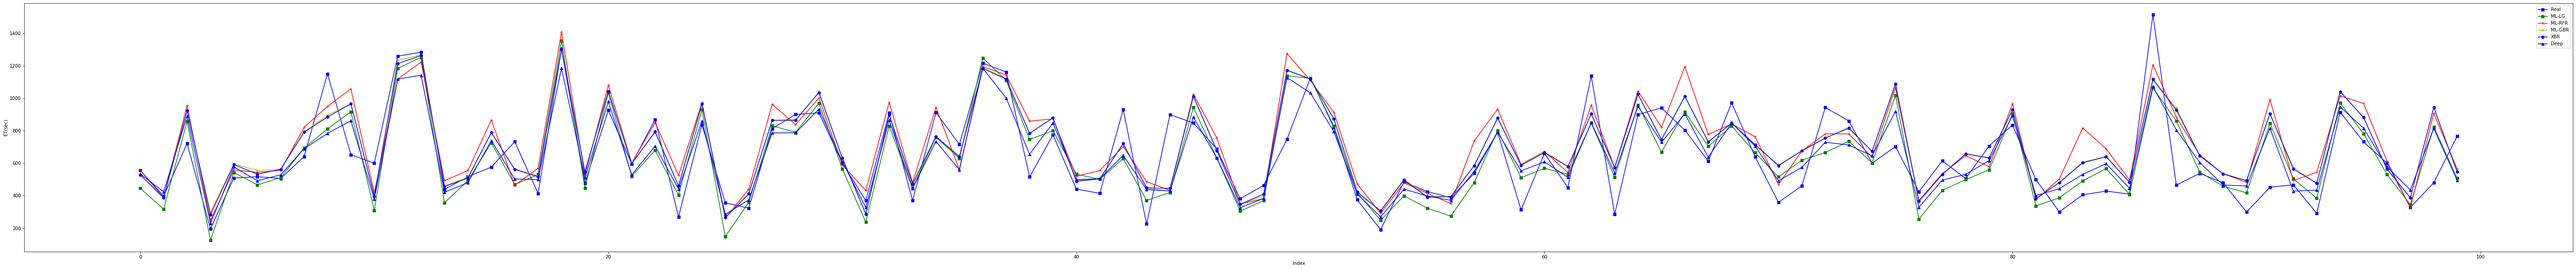

In [13]:
plt.figure(figsize=(100, 10))
idx = np.arange(0, 100)
plt.plot(idx, df_evaluation.ET[0:100], 'b', marker='s')
plt.plot(idx, df_evaluation.ETA1[0:100], 'g', marker='s')
plt.plot(idx, df_evaluation.ETA2[0:100], 'r', marker='+')
plt.plot(idx, df_evaluation.ETA3[0:100], 'y', marker='*')
plt.plot(idx, df_evaluation.ETA4[0:100], 'b', marker='o')
plt.plot(idx, df_evaluation.ETA5[0:100], 'b', marker='^')
plt.plot()
plt.xlabel('Index')
plt.ylabel('ET(sec)')
plt.legend(['Real', 'ML-LG', 'ML-RFR', 'ML-GBR', 'XBR', 'Deep'])
plt.show()